# 클린업 1주차 패키지 과제 - 3팀 선형대수학팀 김지민

## Chapter 1. 전처리

### 문제 0 기본 세팅

In [771]:
library(plyr)
library(tidyverse)
library(data.table)

In [772]:
setwd('C:/Users/fleur/2021 P-SAT/패키지과제/클린업 1주차')

In [773]:
data = fread('data.csv')

Warning message in require_bit64_if_needed(ans):
"Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again."


### 문제 1 데이터 확인하기

In [774]:
# 데이터셋 구성
data %>% str()

Classes 'data.table' and 'data.frame':	5165 obs. of  8 variables:
 $ patient_id    : 'integer64' num  4.94e-315 4.94e-315 4.94e-315 4.94e-315 4.94e-315 ...
 $ sex           : chr  "male" "male" "male" "male" ...
 $ age           : chr  "50s" "30s" "50s" "20s" ...
 $ country       : chr  "Korea" "Korea" "Korea" "Korea" ...
 $ province      : chr  "서울" "서울" "서울" "서울" ...
 $ city          : chr  "강서구" "중랑구" "종로구" "마포구" ...
 $ confirmed_date: IDate, format: "2020-01-23" "2020-01-30" ...
 $ state         : chr  "released" "released" "released" "released" ...
 - attr(*, ".internal.selfref")=<externalptr> 


행 5165개와 열 8개로 이루어진 데이터프레임이다.

In [775]:
# 열마다의 NA 개수
data %>% is.na %>% colSums()

patient_id            sex            age        country       province 
             0              0              0              0              0 
          city confirmed_date          state 
             0              3              0

In [776]:
# 열마다의 unique값
unq = data %>% apply(2, unique)
unq

$patient_id
 [1] "4.940656e-315" "4.940657e-315" "4.940658e-315" "4.940659e-315"
 [5] "4.940660e-315" "4.940661e-315" "4.940662e-315" "4.940663e-315"
 [9] "5.434722e-315" "5.434723e-315" "5.928788e-315" "5.928791e-315"
[13] "5.928792e-315" "5.928793e-315" "5.928794e-315" "5.928795e-315"
[17] "5.928797e-315" "5.928798e-315" "5.928799e-315" "5.928801e-315"
[21] "5.928802e-315" "5.928805e-315" "5.928807e-315" "5.928808e-315"
[25] "5.928816e-315" "5.928823e-315" "5.928847e-315" "5.928846e-315"
[29] "5.928845e-315" "5.928844e-315" "5.928843e-315" "5.928848e-315"
[33] "5.928842e-315" "5.928841e-315" "5.928849e-315" "5.928850e-315"
[37] "5.928840e-315" "5.928851e-315" "6.422853e-315" "6.422854e-315"
[41] "6.916919e-315" "6.916920e-315" "6.916921e-315" "7.410985e-315"
[45] "7.905050e-315" "7.905051e-315" "8.399116e-315" "9.881313e-315"
[49] "9.881314e-315" "9.881315e-315" "9.881316e-315" "9.881317e-315"
[53] "9.881318e-315" "9.881319e-315" "1.482691e-314" "1.484173e-314"
[57] "1.484667e-314" "1.486644e-314" "1.488620e-314" "1.489114e-314"
[61] "1.487138e-314" "1.491090e-314" "1.486149e-314" "1.488126e-314"
[65] "1.976263e-314" "2.025669e-314" "2.470328e-314" "2.519735e-314"
[69] "2.964888e-314" "2.965382e-314" "2.965876e-314" "2.966370e-314"
[73] "2.966864e-314" "2.967358e-314" "2.967852e-314" "2.968346e-314"
[77] "2.968840e-314" "2.969335e-314" "2.969829e-314" "2.970323e-314"
[81] "2.970817e-314" "2.971311e-314" "2.971805e-314" "2.972299e-314"
[85] "2.973781e-314" "2.974275e-314" "2.974325e-314" "2.974769e-314"
[89] "2.975263e-314" "2.975757e-314" "3.013800e-314" "3.013801e-314"
[93] "3.458460e-314"

$sex
[1] "male"   "female" ""      

$age
 [1] "50s"  "30s"  "20s"  "60s"  "80s"  "70s"  "40s"  "10s"  "90s"  "0s"  
[11] ""     "100s"

$country
 [1] "Korea"          "China"          "United States"  "France"        
 [5] "Thailand"       "Canada"         "India"          "Switzerland"   
 [9] "Germany"        "Indonesia"      "Vietnam"        "Foreign"       
[13] "Mongolia"       "United Kingdom" "Spain"          "Bangladesh"    

$province
 [1] "서울"     "부산"     "대구"     "광주"     "인천"     "대전"    
 [7] "경기도"   "세종"     "울산"     "강원도"   "충청북도" "충청남도"
[13] "전라북도" "전라남도" "경상북도" "경상남도" "제주도"  

$city
  [1] "강서구"    "중랑구"    "종로구"    "마포구"    "성북구"    "기타"     
  [7] "송파구"    "서대문구"  "성동구"    "서초구"    "구로구"    "강동구"   
 [13] "은평구"    "금천구"    "관악구"    "노원구"    "동구 구"   "강남구"   
 [19] "양천구"    "광진구"    "동대문구"  "영등포구"  "도봉구"    "용산구"   
 [25] "강북구"    "중구"      "동래구"    "해운대구"  "연제구"    ""         
 [31] "북구"      "남구"      "서구"      "금정구"    "사하구"    "수영구"   
 [37] "사상구"    "부산진구"  "기장"      "동구"      "달서구"    "달성"     
 [43] "수성구"    "달성군"    "경산시"    "상곡 동"   "이천동"    "영천시"   
 [49] "부평구"    "미추홀 구" "연수구"    "계양구"    "남동구"    "강화군"   
 [55] "유성구"    "대덕구"    "수원시"    "세종"      "울주"      "고양시"   
 [61] "평택시"    "부천시"    "구리시"    "시흥시"    "김포시"    "이천시"   
 [67] "포천시"    "안양시"    "용인시"    "파주시"    "남양주시"  "성남시"   
 [73] "과천시"    "광명시"    "화성시"    "오산시"    "군포시"    "의왕시"   
 [79] "안산시"    "광주"      "안성시"    "의정부시"  "하남시"    "동두천시" 
 [85] "양주시"    "가평"      "양평시"    "수원"      "구리"      "강릉시"   
 [91] "삼척시"    "속초"      "원주시"    "춘천시"    "태백시"    "인제"     
 [97] "횡성"      "영월"      "철원"      "증평"      "청주시"    "음성군"   
[103] "충주시"    "괴산"      "단양"      "진천"      "옥천"      "계룡시"   
[109] "천안시"    "아산시"    "서산시"    "홍성"      "태안"      "부여군"   
[115] "서천"      "논산시"    "공주시"    "군산시"    "김제시"    "전주시"   
[121] "익산시"    "장수"      "순천시"    "여수시"    "광양시"    "화순"     
[127] "무안"      "목포시"    "경주시"    "고령"      "구미시"    "군위"     
[133] "김천시"    "문경시"    "봉화"      "상주시"    "성주"      "안동시"   
[139] "영덕"      "영양"      "영주시"    "예천"      "의성"      "청도"     
[145] "청송"      "칠곡"      "포항시"    "합천"      "진주시"    "창원시"   
[151] "양산"      "거제"      "함양"      "고성"      "김해시"    "남해"     
[157] "거창"      "창녕"      "밀양시"    "하만"      "산청"      "사천시"   
[163] "제주도"   

$confirmed_date
  [1] "2020-01-23" "2020-01-30" "2020-01-31" "2020-02-02" "2020-02-05"
  

In [777]:
# 열마다의 unique값 개수
unq %>% lengths()

patient_id            sex            age        country       province 
            93              3             12             16             17 
          city confirmed_date          state 
           163            149              3

### 문제 2-1 NA가 있는 행 삭제

In [783]:
data_nadel = data %>% na.omit
data_nadel %>% head()

patient_id,sex,age,country,province,city,confirmed_date,state
<int64>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
4.940656e-315,male,50s,Korea,서울,강서구,2020-01-23,released
4.940656e-315,male,30s,Korea,서울,중랑구,2020-01-30,released
4.940656e-315,male,50s,Korea,서울,종로구,2020-01-30,released
4.940656e-315,male,20s,Korea,서울,마포구,2020-01-30,released
4.940656e-315,female,20s,Korea,서울,성북구,2020-01-31,released
4.940656e-315,female,50s,Korea,서울,종로구,2020-01-31,released


In [784]:
data_nadel %>% nrow()

[1] 5162

NA가 있었던 행 3개가 삭제되었다.

### 문제 2-2 빈 문자열("")이 있는 행 삭제

In [785]:
data_nadel = data_nadel[-which(data_nadel == "", arr.ind = TRUE)[,1],]
data_nadel %>% head()

Warning message in `[.data.table`(data_nadel, -which(data_nadel == "", arr.ind = TRUE)[, :
"Item 1123 of i is -564 which removes that item but that has occurred before. Ignoring this dup and 1123 other dups."


patient_id,sex,age,country,province,city,confirmed_date,state
<int64>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
4.940656e-315,male,50s,Korea,서울,강서구,2020-01-23,released
4.940656e-315,male,30s,Korea,서울,중랑구,2020-01-30,released
4.940656e-315,male,50s,Korea,서울,종로구,2020-01-30,released
4.940656e-315,male,20s,Korea,서울,마포구,2020-01-30,released
4.940656e-315,female,20s,Korea,서울,성북구,2020-01-31,released
4.940656e-315,female,50s,Korea,서울,종로구,2020-01-31,released


In [786]:
data_nadel %>% nrow()

[1] 3690

빈 문자열이 있었던 행 1472개가 추가적으로 삭제되었다.

In [787]:
# 열마다의 NA 개수
data_nadel %>% is.na %>% colSums()

patient_id            sex            age        country       province 
             0              0              0              0              0 
          city confirmed_date          state 
             0              0              0

In [788]:
# 열마다의 unique값
unq_nadel = data_nadel %>% apply(2, unique)
unq_nadel

$patient_id
 [1] "4.940656e-315" "4.940657e-315" "4.940658e-315" "4.940659e-315"
 [5] "4.940660e-315" "4.940661e-315" "4.940662e-315" "4.940663e-315"
 [9] "5.434722e-315" "5.434723e-315" "5.928788e-315" "5.928847e-315"
[13] "5.928846e-315" "5.928845e-315" "5.928844e-315" "5.928843e-315"
[17] "5.928848e-315" "5.928842e-315" "5.928841e-315" "5.928849e-315"
[21] "5.928850e-315" "5.928840e-315" "5.928851e-315" "6.916919e-315"
[25] "7.410985e-315" "7.905050e-315" "7.905051e-315" "8.399116e-315"
[29] "9.881313e-315" "9.881314e-315" "9.881315e-315" "9.881316e-315"
[33] "9.881317e-315" "1.482691e-314" "1.484173e-314" "1.484667e-314"
[37] "1.486644e-314" "1.488620e-314" "1.489114e-314" "1.487138e-314"
[41] "1.491090e-314" "1.486149e-314" "1.488126e-314" "1.976263e-314"
[45] "2.025669e-314" "2.470328e-314" "2.519735e-314" "2.964888e-314"
[49] "2.965382e-314" "2.965876e-314" "2.966370e-314" "2.967358e-314"
[53] "2.967852e-314" "2.968346e-314" "2.968840e-314" "2.969335e-314"
[57] "2.969829e-314" "2.970817e-314" "2.971311e-314" "2.971805e-314"
[61] "2.972299e-314" "2.973781e-314" "2.974275e-314" "2.974325e-314"
[65] "2.974769e-314" "2.975263e-314" "2.975757e-314" "3.013800e-314"
[69] "3.013801e-314" "3.458460e-314"

$sex
[1] "male"   "female"

$age
 [1] "50s"  "30s"  "20s"  "60s"  "80s"  "70s"  "40s"  "10s"  "90s"  "0s"  
[11] "100s"

$country
 [1] "Korea"          "China"          "United States"  "France"        
 [5] "Thailand"       "Canada"         "Switzerland"    "Germany"       
 [9] "Indonesia"      "Vietnam"        "Foreign"        "Mongolia"      
[13] "United Kingdom" "Spain"          "Bangladesh"    

$province
 [1] "서울"     "부산"     "대구"     "인천"     "대전"     "경기도"  
 [7] "세종"     "울산"     "강원도"   "충청북도" "충청남도" "전라북도"
[13] "전라남도" "경상북도" "경상남도" "제주도"  

$city
  [1] "강서구"    "중랑구"    "종로구"    "마포구"    "성북구"    "기타"     
  [7] "송파구"    "서대문구"  "성동구"    "서초구"    "구로구"    "강동구"   
 [13] "은평구"    "금천구"    "관악구"    "노원구"    "동구 구"   "강남구"   
 [19] "양천구"    "광진구"    "동대문구"  "영등포구"  "도봉구"    "용산구"   
 [25] "강북구"    "중구"      "동래구"    "해운대구"  "연제구"    "북구"     
 [31] "남구"      "서구"      "금정구"    "사하구"    "수영구"    "사상구"   
 [37] "부산진구"  "기장"      "동구"      "달서구"    "달성"      "수성구"   
 [43] "달성군"    "경산시"    "상곡 동"   "이천동"    "영천시"    "부평구"   
 [49] "미추홀 구" "연수구"    "계양구"    "남동구"    "강화군"    "유성구"   
 [55] "대덕구"    "수원시"    "세종"      "울주"      "고양시"    "평택시"   
 [61] "부천시"    "구리시"    "시흥시"    "김포시"    "이천시"    "포천시"   
 [67] "안양시"    "용인시"    "파주시"    "남양주시"  "성남시"    "과천시"   
 [73] "광명시"    "화성시"    "오산시"    "군포시"    "의왕시"    "안산시"   
 [79] "광주"      "안성시"    "의정부시"  "하남시"    "동두천시"  "양주시"   
 [85] "가평"      "양평시"    "강릉시"    "삼척시"    "속초"      "원주시"   
 [91] "춘천시"    "태백시"    "인제"      "횡성"      "영월"      "철원"     
 [97] "증평"      "청주시"    "음성군"    "충주시"    "괴산"      "단양"     
[103] "진천"      "옥천"      "계룡시"    "천안시"    "아산시"    "서산시"   
[109] "홍성"      "태안"      "부여군"    "서천"      "논산시"    "공주시"   
[115] "군산시"    "김제시"    "전주시"    "익산시"    "장수"      "순천시"   
[121] "여수시"    "광양시"    "화순"      "무안"      "목포시"    "경주시"   
[127] "고령"      "구미시"    "김천시"    "문경시"    "봉화"      "상주시"   
[133] "성주"      "안동시"    "영양"      "영주시"    "예천"      "의성"     
[139] "청도"      "청송"      "칠곡"      "포항시"    "합천"      "진주시"   
[145] "창원시"    "양산"      "거제"      "함양"      "고성"      "김해시"   
[151] "남해"      "거창"      "창녕"      "밀양시"    "하만"      "산청"     
[157] "사천시"    "제주도"   

$confirmed_date
  [1] "2020-01-23" "2020-01-30" "2020-01-31" "2020-02-02" "2020-02-05"
  [6] "2020-02-06" "2020-02-07" "2020-02-16" "2020-02-19" "2020-02-20"
 [11] "2020-02-21" "2020-02-22" "2020-02-23" "2020-02-26" "2020-02-24"
 [16] "2020-02-25" "2020-02-27" "2020-02-28" "2020-02-29" "2020-03-01"
 [21] "2020-03-02" "2020-03-04" "2020-03-05" "2020-03-06" "2020-03-07"
 [26] "2020-03-08" "2020-03-09" "2020-03-10" "2020-03-11" "2020-03-12"
 [31] "2020-03-13" "2020-03-14" "2020-03-15" "2020-03-16" "2020-03-17"
 [36] "2020-03-18" "2020-03-19" "2020-03-20" "2020-03-21" "2020-03-22"
 [4

In [789]:
# 열마다의 unique값 개수
unq_nadel %>% lengths()

patient_id            sex            age        country       province 
            70              2             11             15             16 
          city confirmed_date          state 
           158            145              3

* patient_id: 93 > 70  
* sex: 3 > 2 (빈 문자열 제거)  
* age: 12 > 11 (빈 문자열 제거)  
* country: 16 > 15 ('India' 제거)  
* province: 17 > 16 ('광주' 제거)  
* city: 163 > 158  
* confirmed_date: 149 > 145  
* state: 3 > 3  

### 문제 3 대한민국 데이터만 남기고 변수 'country' 삭제

In [793]:
data_pre = data_nadel[data_nadel$country == 'Korea', -'country']
data_pre %>% head()

patient_id,sex,age,province,city,confirmed_date,state
<int64>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
4.940656e-315,male,50s,서울,강서구,2020-01-23,released
4.940656e-315,male,30s,서울,중랑구,2020-01-30,released
4.940656e-315,male,50s,서울,종로구,2020-01-30,released
4.940656e-315,male,20s,서울,마포구,2020-01-30,released
4.940656e-315,female,20s,서울,성북구,2020-01-31,released
4.940656e-315,female,50s,서울,종로구,2020-01-31,released


### 문제 4 변수 'province' 값 변환

In [794]:
data_pre$province = data_pre$province %>% replace(which(data_pre$province == '서울'), '서울특별시')
data_pre$province = data_pre$province %>% replace(which(data_pre$province == '부산'), '부산광역시')
data_pre$province = data_pre$province %>% replace(which(data_pre$province == '대구'), '대구광역시')
data_pre$province = data_pre$province %>% replace(which(data_pre$province == '인천'), '인천광역시')
data_pre$province = data_pre$province %>% replace(which(data_pre$province == '대전'), '대전광역시')
data_pre$province = data_pre$province %>% replace(which(data_pre$province == '세종'), '세종특별자치시')
data_pre$province = data_pre$province %>% replace(which(data_pre$province == '울산'), '울산광역시')
data_pre$province = data_pre$province %>% replace(which(data_pre$province == '제주도'), '제주특별자치도')
data_pre %>% head()

patient_id,sex,age,province,city,confirmed_date,state
<int64>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
4.940656e-315,male,50s,서울특별시,강서구,2020-01-23,released
4.940656e-315,male,30s,서울특별시,중랑구,2020-01-30,released
4.940656e-315,male,50s,서울특별시,종로구,2020-01-30,released
4.940656e-315,male,20s,서울특별시,마포구,2020-01-30,released
4.940656e-315,female,20s,서울특별시,성북구,2020-01-31,released
4.940656e-315,female,50s,서울특별시,종로구,2020-01-31,released


### 문제 5 변수 'confirmed_date' 형식 변환

In [795]:
data_pre$confirmed_date = data_pre$confirmed_date %>% as.Date()
data_pre %>% str()

Classes 'data.table' and 'data.frame':	3653 obs. of  7 variables:
 $ patient_id    : 'integer64' num  4.94e-315 4.94e-315 4.94e-315 4.94e-315 4.94e-315 ...
 $ sex           : chr  "male" "male" "male" "male" ...
 $ age           : chr  "50s" "30s" "50s" "20s" ...
 $ province      : chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ city          : chr  "강서구" "중랑구" "종로구" "마포구" ...
 $ confirmed_date: Date, format: "2020-01-23" "2020-01-30" ...
 $ state         : chr  "released" "released" "released" "released" ...
 - attr(*, ".internal.selfref")=<externalptr> 


### 문제 6 파생변수 'confirmed_number'(확진날짜별 확진자 수) 생성

In [796]:
confirmed = data_pre %>% group_by(confirmed_date) %>% summarise(confirmed_number = n()) %>% ungroup()
confirmed %>% head()

`summarise()` ungrouping output (override with `.groups` argument)



confirmed_date,confirmed_number
<date>,<int>
2020-01-23,1
2020-01-26,1
2020-01-27,1
2020-01-30,4
2020-01-31,3
2020-02-02,2


In [797]:
data_prcssd = data_pre %>% merge(confirmed, by = "confirmed_date", all = FALSE)
data_prcssd %>% head()

confirmed_date,patient_id,sex,age,province,city,state,confirmed_number
<date>,<int64>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
2020-01-23,4.940656e-315,male,50s,서울특별시,강서구,released,1
2020-01-26,9.881313e-315,male,50s,경기도,고양시,released,1
2020-01-27,9.881313e-315,male,50s,경기도,평택시,released,1
2020-01-30,4.940656e-315,male,30s,서울특별시,중랑구,released,4
2020-01-30,4.940656e-315,male,50s,서울특별시,종로구,released,4
2020-01-30,4.940656e-315,male,20s,서울특별시,마포구,released,4


### 문제 7 파생변수 'wday'(확진날짜의 주말 여부) 생성

In [798]:
data_prcssd$wday = ifelse(wday(data_prcssd$confirmed_date) %in% c(2,3,4,5,6), "주중", "주말")
data_prcssd %>% head()

confirmed_date,patient_id,sex,age,province,city,state,confirmed_number,wday
<date>,<int64>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
2020-01-23,4.940656e-315,male,50s,서울특별시,강서구,released,1,주중
2020-01-26,9.881313e-315,male,50s,경기도,고양시,released,1,주말
2020-01-27,9.881313e-315,male,50s,경기도,평택시,released,1,주중
2020-01-30,4.940656e-315,male,30s,서울특별시,중랑구,released,4,주중
2020-01-30,4.940656e-315,male,50s,서울특별시,종로구,released,4,주중
2020-01-30,4.940656e-315,male,20s,서울특별시,마포구,released,4,주중


### 문제 8 나이대별 일별 확진자 수 summary

In [799]:
data_prcssd %>% group_by(age, confirmed_date) %>% summarise(n = n(), .groups = "drop") %>% ungroup() %>% with(tapply(n, age, summary))

$`0s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.488   2.000   3.000 

$`100s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

$`10s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.276   3.000   8.000 

$`20s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.500   7.526  11.000  43.000 

$`30s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   5.051   8.000  17.000 

$`40s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   4.931   6.000  33.000 

$`50s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   6.112   9.000  31.000 

$`60s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   4.722   7.000  22.000 

$`70s`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.908   3.250  13.000 

$`80s`
   Min. 1st Qu.  Median    Mean 3rd Qu.

## Chapter 2. 시각화

### 문제 1 Line Plot - 확진자 수 추이 그래프

In [851]:
# 최대 확진자에 대한 정보
max = data_prcssd[which(data_prcssd$confirmed_number == max(data_prcssd$confirmed_number)), c('confirmed_date', 'confirmed_number')] %>% unique()

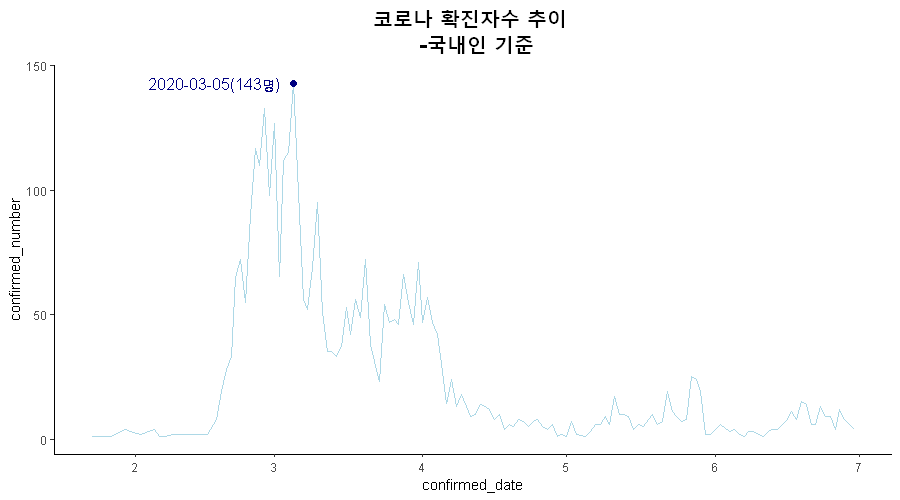

In [852]:
options(repr.plot.width = 9, repr.plot.height = 5)
data_prcssd %>% ggplot(aes(x = confirmed_date, y = confirmed_number)) +
  geom_line(color = 'lightblue') +
  geom_point(aes(x = max$confirmed_date, y = max$confirmed_number), color = 'navy', size=2) +
  geom_text(aes(x = max$confirmed_date, y = max$confirmed_number, 
                label = paste0(max$confirmed_date, "(", max$confirmed_number,"명)")), 
            color = 'navy', size = 4, hjust = 1.1) +
  ggtitle("코로나 확진자수 추이 \n -국내인 기준") +
  theme(axis.line = element_line(colour = "black"),
        panel.background = element_blank(),
        plot.title = element_text(face = 'bold', hjust = 0.5, size = 18))

### 문제 1-2 Line Plot - 'province'별 확진자 수 추이 그래프

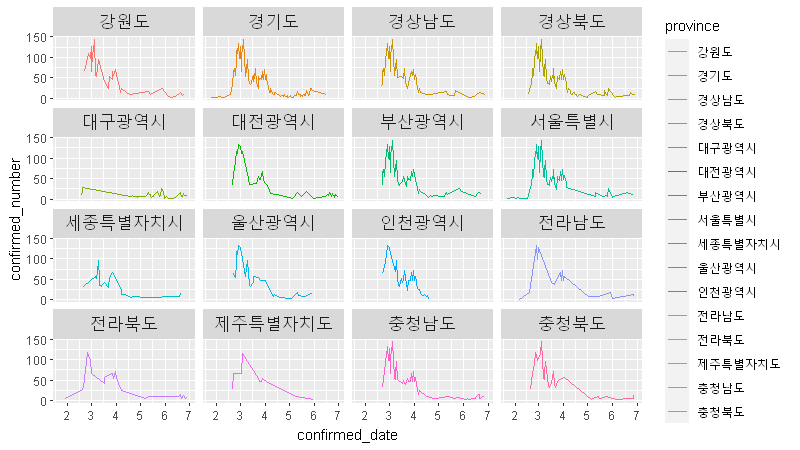

In [806]:
options(repr.plot.width = 8, repr.plot.height = 4.5)
data_prcssd %>% group_by(confirmed_date, province) %>% ungroup() %>% 
  ggplot(aes(x = confirmed_date, y = confirmed_number, group = province)) + 
  geom_line(aes(color = province)) +
  theme(strip.text.x = element_text(size = 16, margin = margin(b = 5))) +
  facet_wrap( ~ province)

### 문제 2 Bar Plot - 지역별 'state'별 확진자 수 그래프

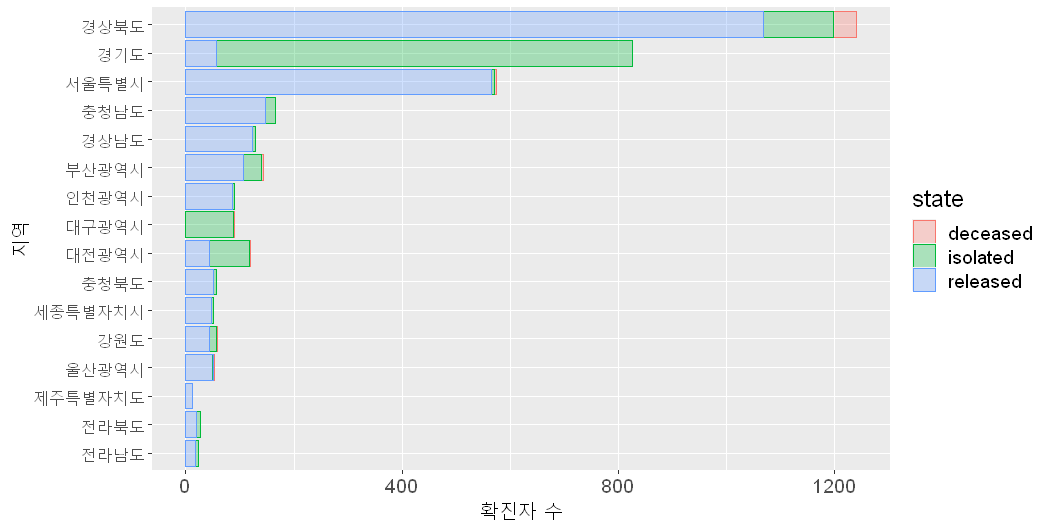

In [807]:
options(repr.plot.width = 10.5, repr.plot.height = 5.3)
data_prcssd %>% ggplot(aes(x = province, fill = state)) +
  geom_bar(aes(fill = state, color = state), alpha = 0.3) +
  labs(x = "지역", y = "확진자 수", fill = "state") +
  scale_x_discrete(limits = rev(c("경상북도", "경기도", "서울특별시", "충청남도", "경상남도", "부산광역시", 
                            "인천광역시", "대구광역시", "대전광역시", "충청북도", "세종특별자치시", 
                            "강원도", "울산광역시", "제주특별자치도", "전라북도", "전라남도"))) +
  theme(text = element_text(size = 17)) +
  coord_flip()

### 문제 3 Box Plot - 나이대별 일별 확진자 수 그래프

In [814]:
# 나이대별 일별 확진자 수 데이터셋
agendate = data_prcssd %>% group_by(age, confirmed_date) %>% summarise(n = n(), .groups = "drop") %>% ungroup() %>% as.data.frame()
agendate %>% head()

,age,confirmed_date,n
,<chr>,<date>,<int>
1,0s,2020-02-24,1
2,0s,2020-02-26,1
3,0s,2020-02-27,1
4,0s,2020-02-28,1
5,0s,2020-02-29,3
6,0s,2020-03-01,3


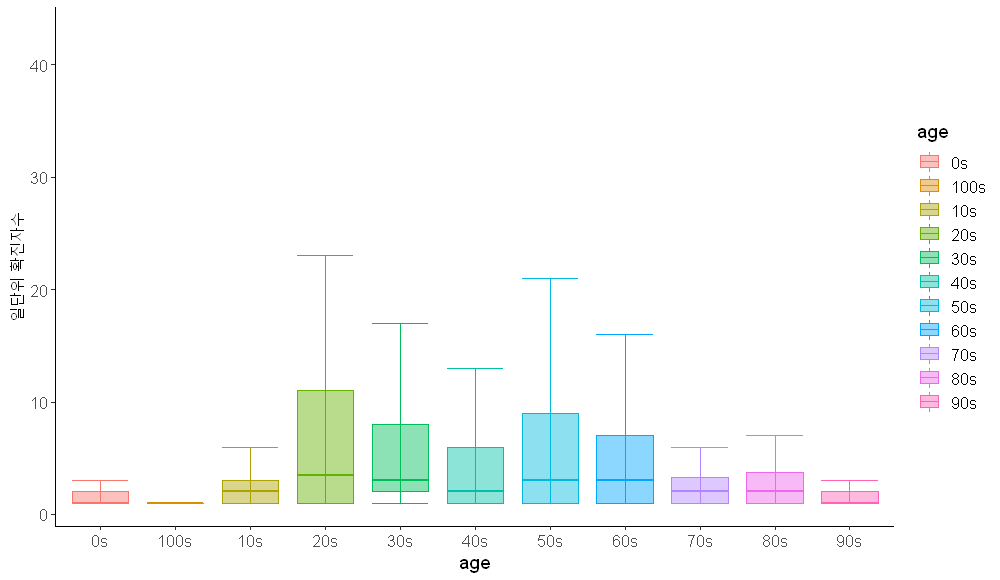

In [818]:
options(repr.plot.width = 10, repr.plot.height = 5.8)
agendate %>% ggplot(aes(x = age, y = n, fill = age)) +
  geom_boxplot(aes(fill = age, color = age), alpha = 0.45, outlier.shape = NA) +
  stat_boxplot(geom ='errorbar', aes(color = age)) + 
  labs(y = "일단위 확진자수") +
  theme(axis.line = element_line(colour = "black"),
        panel.background = element_blank(),
        legend.key = element_rect(fill = 'white'),
        text = element_text(size = 14))

### 문제 3-2 - 나이대별 일별 확진자 수에 대한 one-way ANOVA

In [819]:
agendate$age = agendate$age %>% as.factor()
aov(n ~ ., data = agendate) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)    
age             10   2575     257   11.12 <2e-16 ***
confirmed_date   1   4731    4731  204.36 <2e-16 ***
Residuals      779  18033      23                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

ANOVA 결과,  
'age'(나이대)와 'confirmed_date'(확진 날짜)의 p-value가 매우 작아 둘 모두 유의미한 영향을 가진 변수인 것으로 나타났다.  
따라서 나이대와 확진 날짜에 따라 확진자 수에 상당한 차이가 있는 것으로 결론지을 수 있다.

### 문제 4 Map

In [820]:
library(raster)
library(rgeos)
library(maptools)
library(rgdal)

In [821]:
map = readOGR('TL_SCCO_CTPRVN.shp') %>% fortify()
map %>% head()

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
"Discarded datum International_Terrestrial_Reference_Frame_2000 in CRS definition: +proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs"


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\fleur\2021 P-SAT\패키지과제\클린업 1주차\TL_SCCO_CTPRVN.shp", layer: "TL_SCCO_CTPRVN"
with 17 features
It has 3 fields


Regions defined for each Polygons



,long,lat,order,hole,piece,id,group
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>
1,1091705,2034023,1,FALSE,1,0,0.1
2,1091705,2034038,2,FALSE,1,0,0.1
3,1091656,2034038,3,FALSE,1,0,0.1
4,1091616,2034059,4,FALSE,1,0,0.1
5,1091570,2034089,5,FALSE,1,0,0.1
6,1091550,2034094,6,FALSE,1,0,0.1


id 변수에 따라   
* 0: 강원도
* 1: 경기도
* 2: 경상남도
* 3: 경상북도
* 4: 경상북도
* 5: 대구광역시
* 6: 대전광역시
* 7: 부산광역시
* 8: 서울특별시
* 9: 세종특별자치시
* 10: 울산광역시
* 11: 인천광역시
* 12: 전라남도
* 13: 전라북도
* 14: 제주특별자치도
* 15: 충청남도
* 16: 충청북도

In [822]:
# 변수 'province'에 각 id별 지역명
map$province = ifelse(map$id == 0, '강원도', 
                      ifelse(map$id == 1, '경기도', 
                      ifelse(map$id == 2, '경상남도', 
                      ifelse(map$id == 3, '경상북도', 
                      ifelse(map$id == 5, '대구광역시',
                      ifelse(map$id == 6, '대전광역시',
                      ifelse(map$id == 7, '부산광역시',
                      ifelse(map$id == 8, '서울특별시',
                      ifelse(map$id == 9, '세종특별자치시',
                      ifelse(map$id == 10, '울산광역시',
                      ifelse(map$id == 11, '인천광역시',
                      ifelse(map$id == 12, '전라남도',
                      ifelse(map$id == 13, '전라북도',
                      ifelse(map$id == 14, '제주특별자치도',
                      ifelse(map$id == 15, '충청남도',
                      ifelse(map$id == 16, '충청북도', '경상북도'))))))))))))))))

In [823]:
prov_n = data_prcssd %>% group_by(province) %>% summarize(n = n()) %>% ungroup()
map_data = left_join(map, prov_n, 'province')
map_data %>% head()

`summarise()` ungrouping output (override with `.groups` argument)



,long,lat,order,hole,piece,id,group,province,n
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>,<chr>,<int>
1,1091705,2034023,1,FALSE,1,0,0.1,강원도,59
2,1091705,2034038,2,FALSE,1,0,0.1,강원도,59
3,1091656,2034038,3,FALSE,1,0,0.1,강원도,59
4,1091616,2034059,4,FALSE,1,0,0.1,강원도,59
5,1091570,2034089,5,FALSE,1,0,0.1,강원도,59
6,1091550,2034094,6,FALSE,1,0,0.1,강원도,59


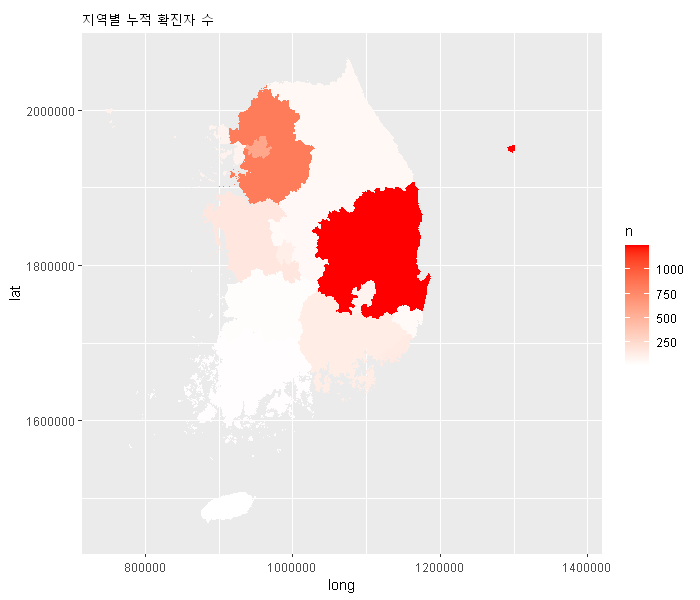

In [824]:
options(repr.plot.width = 7, repr.plot.height = 6)
map_data %>% ggplot(aes(x = long, y = lat, fill = n)) +
  geom_polygon(aes(x = long, y = lat, group = group)) +
  scale_fill_gradient(low = 'white', high = 'red') +
  labs(title = '지역별 누적 확진자 수')

## Chapter 3. 모델링_회귀분석

In [825]:
library(MASS)
library(corrplot)
library(caret)
library(MLmetrics)

In [826]:
# 'Boston' 데이터셋
Boston %>% head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


보스턴 시의 주택 가격에 대한 데이터이다.  
  
* CRIM - per capita crime rate by town (자치시별 1인당 범죄율)  
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft. (25,000 평방피트를 초과하는 거주지역의 비율)    
* INDUS - proportion of non-retail business acres per town (비소매상업지역이 점유하고 있는 토지 비율)  
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) (찰스강의 경계에 위치하면 1, 아니면 0)  
* NOX - nitric oxides concentration (parts per 10 million) (10ppm당 농축 일산화질소)  
* RM - average number of rooms per dwelling (주택 1가구당 평균 방 개수)  
* AGE - proportion of owner-occupied units built prior to 1940 (1940년 이전에 건축된 소유주택 비율)  
* DIS - weighted distances to five Boston employment centres (5개의 보스턴 직업센터까지의 접근성 지수)  
* RAD - index of accessibility to radial highways (방사형 도로까지의 접근성 지수)    
* TAX - full-value property-tax rate per 10,000달러 (10,000달러당 재산세율)    
* PTRATIO - pupil-teacher ratio by town (자치시별 학생/교사 비율)  
* BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (Bk = 자치시별 흑인의 비율)  
* LSTAT - % lower status of the population (모집단의 하위계층의 비율)  
* MEDV - Median value of owner-occupied homes in 1000달러's (본인 소유 주택 가격의 중앙값(단위: 1000달러))  

### 문제 1 상관계수 플랏

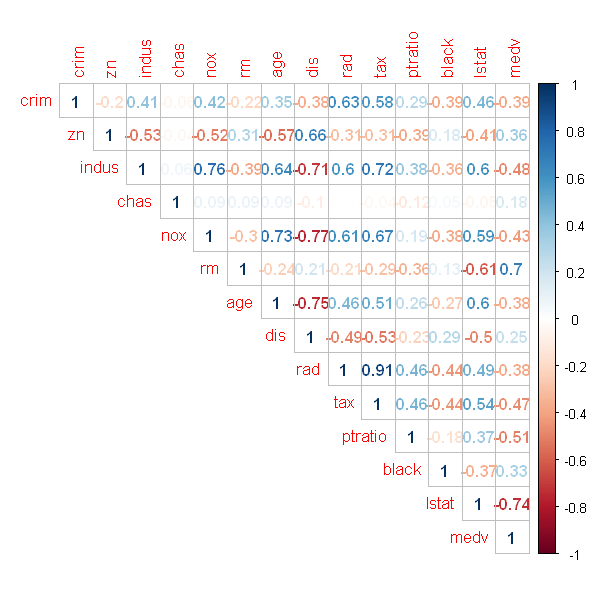

In [827]:
options(repr.plot.width = 6, repr.plot.height = 6)
corrplot(cor(Boston), method="number", type="upper")

**종속변수 'medv'와 양의 상관관계를 가진 변수들:**  
black, dis, rm(강), chas, zn  
  
**종속변수 'medv'와 음의 상관관계를 가진 변수들:**  
lstat(강), ptratio, tax, rad, age, nox, indus, crim  
  
**독립변수들 간 강한 상관관계:**  
crim과 rad(+), crim과 tax(+), zn과 indus(-), zn과 nox(-), zn과 age(-), zn과 dis(+), indus와 nox(+), 
indus와 age(+),   
indus와 dis(-), indus와 rad(+), indus와 tax(+), indus와 lstat(+), nox와 age(-), nox와 dis(-), nox와 rad(+), nox와 tax(+),  
nox와 lstat(+), rm과 lstat(-), age와 dis(-), age와 tax(+), dis와 tax(-), dis와 lstat(-), rad와 tax(+), tax와 lstat(+)

흑인 비율, 보스턴 직업센터까지의 접근성 지수, 평균 방 개수, 찰스강의 경계 여부, 25,000 평방피트를 초과하는 거주지역 비율이 주택 가격과 양의 상관관계를, 하위계층 비율, 학생/교사 비율, 재산세율, 방사형 도로까지의 접근성 지수, 1940년 이전에 건축된 소유주택 비율, 농축 일산화질소, 비소매상업지역이 점유하고 있는 토지 비율, 1인당 범죄율은 주택 가격과 음의 상관관계를 가진 것으로 나타났다. 그중에서도 특히 **주택 1가구당 평균 방 개수**가 주택 가격과 강한 양의 상관관계를, **하위계층의 비율**이 강한 음의 상관관계를 가지고 있는 것으로 보인다.  
또한 'chas', 즉 찰스강의 경계에 위치하는지 여부는 여타 독립변수들과의 상관관계가 약했고, 'rad'와 'tax', 즉 방사형 도로까지의 접근성 지수와 재산세율은 그 상관관계가 0.91로 서로 매우 밀접한 관련이 있는 변수들인 것으로 판단할 수 있었다. 전반적으로는 독립변수들 간에 강한 상관관계를 가지는 듯 보이는 경우가 꽤 많았다.

### 문제 2 종속변수 'medv'와 이외 변수들 간 관계 시각화

In [829]:
boston_gthr = Boston %>% gather(key = 'val', value = 'value', -medv)
boston_gthr %>% head()

,medv,val,value
,<dbl>,<chr>,<dbl>
1,24.0,crim,0.00632
2,21.6,crim,0.02731
3,34.7,crim,0.02729
4,33.4,crim,0.03237
5,36.2,crim,0.06905
6,28.7,crim,0.02985


`geom_smooth()` using formula 'y ~ x'



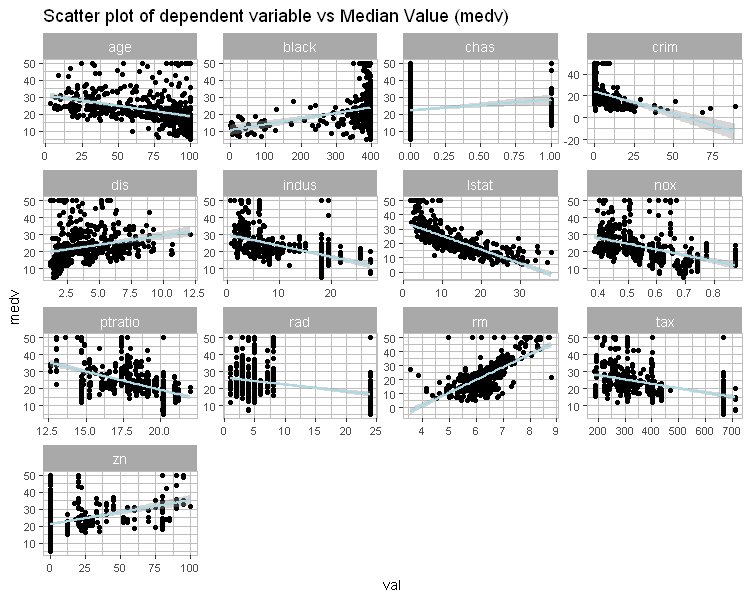

In [830]:
options(repr.plot.width = 7.5, repr.plot.height = 6)
boston_gthr %>% ggplot(aes(x = value, y = medv, group = val)) +
  geom_point() +
  stat_smooth(method = 'lm', color = 'lightblue') +
  labs(x = 'val', y = 'medv', title = 'Scatter plot of dependent variable vs Median Value (medv)') +
  theme(panel.background = element_rect(fill = "white", color = 'gray'),
        panel.grid.major = element_line(color = "gray"), 
        panel.grid.minor = element_line(color = "gray"), 
        strip.background = element_rect(fill="darkgray"),
        strip.text = element_text(size = 10, color = "white"),
        plot.title = element_text(size = 13),
        text = element_text(color = 'black', size = 10))  +
  facet_wrap( ~ val, scales = 'free')

### 문제 3 train set & test set 생성

In [867]:
set.seed(1234)
test_idx = createDataPartition(Boston$medv, p = 0.3, list = FALSE)
train = Boston[-test_idx, ]
test = Boston[test_idx, ]

In [868]:
train %>% nrow()

[1] 352

In [869]:
test %>% nrow()

[1] 154

### 문제 3-2 회귀모형 적합과 평가

In [870]:
fit = lm(medv ~ ., data = train)
summary(fit)


Call:
lm(formula = medv ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.0384  -2.9740  -0.6509   1.9955  25.8605 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.338469   6.443165   4.864 1.77e-06 ***
crim         -0.062724   0.052645  -1.191 0.234314    
zn            0.033353   0.017059   1.955 0.051385 .  
indus        -0.002893   0.078701  -0.037 0.970694    
chas          4.117611   1.041972   3.952 9.45e-05 ***
nox         -17.877732   4.548014  -3.931 0.000103 ***
rm            4.658799   0.524966   8.874  < 2e-16 ***
age          -0.009814   0.015968  -0.615 0.539248    
dis          -1.385488   0.238406  -5.811 1.43e-08 ***
rad           0.249784   0.085407   2.925 0.003681 ** 
tax          -0.010480   0.004763  -2.200 0.028452 *  
ptratio      -0.968775   0.160672  -6.030 4.31e-09 ***
black         0.008569   0.003464   2.474 0.013854 *  
lstat        -0.443657   0.063281  -7.011 1.29e-11 ***
---
Signif. 

선형회귀모델 적합 결과,  
종속변수 medv에 있어 crim, zn, indus와 age를 제외한 모든 변수가 통계적으로 유의미한 영향을 가지는 것으로 나타났다. 또한 zn, chas, rm, rad, black은 medv에 양의 영향을, crim, indus, nox, age, dis, tax, ptratio, lstat은 음의 영향을 끼치는 것으로 보였다. 계수의 해석은 '주택 1가구당 평균 방 개수(rm)가 1 늘어날수록 주택 가격의 중앙값(medv)이 4.66단위만큼 증가한다'와 같은 방식으로 행할 수 있었다. 더불어 Adjusted R-squared값으로 미루어 보아 해당 회귀식은 약 73.6% 정도의 설명력을 가지고 있음을 파악할 수 있었고, F-statistic의 p-value값이 매우 작아 신뢰수준 95%에서 귀무가설을 기각할 수 있으므로 모든 회귀계수는 0이 아니라는 결론을 내릴 수 있었다.

In [871]:
yhat = predict(fit, test)
RMSE(yhat, test$medv)

[1] 4.621192

### 문제 3-3 모델의 RMSE 낮추는 방법

상관분석과 선형회귀분석의 결과 등을 토대로 진행하는 변수의 추가적 정제, 차원축소기법(ex. PCA), variable selection을 통한 적절한 변수 조합 선택 등의 방안으로 RMSE를 낮출 수 있다.

### 문제 4 회귀 계수 시각화

In [873]:
coef = summary(fit)$coefficients %>% as.data.frame() %>% dplyr::select(Estimate)
coef

,Estimate
,<dbl>
(Intercept),31.338468702
crim,-0.062723667
zn,0.033353221
indus,-0.002893420
chas,4.117610945
nox,-17.877732453
rm,4.658798780
age,-0.009813774
dis,-1.385487978


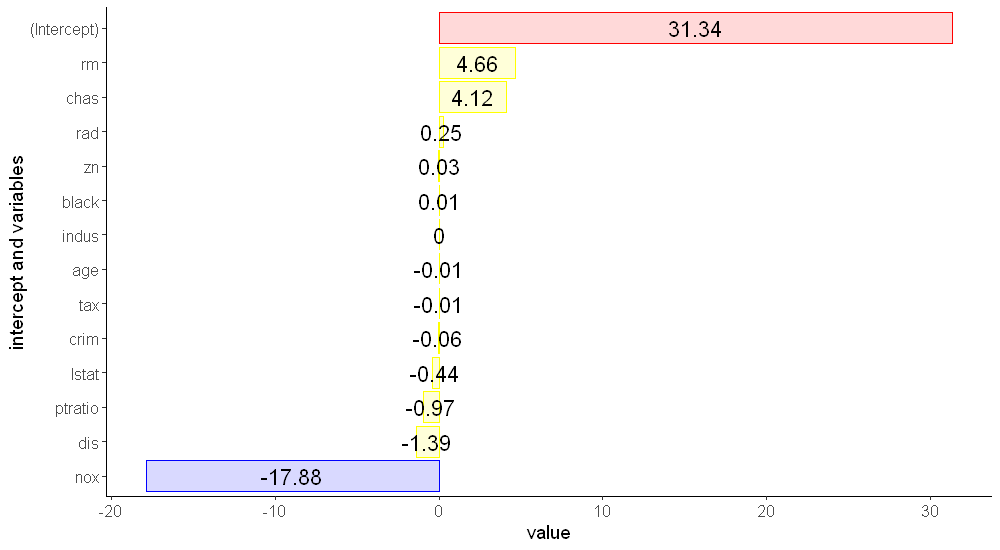

In [875]:
palette <- c('(Intercept)' = 'red',
             'nox' = 'blue',
             'rm' = 'yellow',
             'chas' = 'yellow',
             'rad' = 'yellow',
             'zn' = 'yellow',
             'black' = 'yellow',
             'indus' = 'yellow',
             'age' = 'yellow',
             'tax' = 'yellow',
             'crim' = 'yellow',
             'lstat' = 'yellow',
             'ptratio' = 'yellow',
             'dis' = 'yellow')
             
options(repr.plot.width = 10, repr.plot.height = 5.5)
coef %>% ggplot(aes(x = reorder(rownames(coef), Estimate), y = Estimate, 
                     fill = rownames(coef))) +
  geom_col(aes(color = rownames(coef)), alpha = 0.15) +
  labs(x = "intercept and variables", y = "value") +
  scale_fill_manual(values = palette) +
  scale_color_manual(values = palette) +
  geom_text(aes(label = round(Estimate, 2)), position = position_stack(0.5), size = 5.5) +
  theme(axis.line = element_line(colour = "black"),
        panel.background = element_blank(),
        text = element_text(size = 14),
        legend.position = "none") +
  coord_flip()